 📦 Import modules


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

 🔧 Custom imports from src/


In [4]:
from pathlib import Path
import sys
sys.path.append(str(Path("..")))  # Allows importing from /src

from src.data_loader import load_news_data
from src.sentiment_analysis import apply_sentiment

Load the Data

In [9]:

df = load_news_data("../data/raw_analyst"
"_ratings/raw_analyst"
"_ratings.csv")
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Headline Length Analysis
We'll analyze how long each headline is and visualize the distribution.

🔹 Add Headline Length Column

In [12]:
df['headline_length'] = df['headline'].apply(len)


🔹 Plot Headline Length Distribution

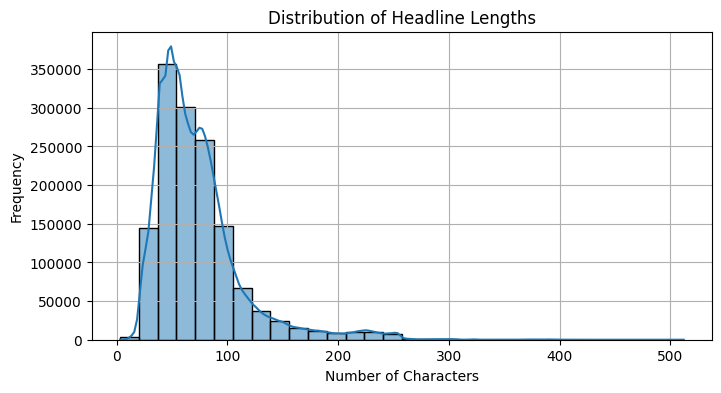

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Publisher Frequency
Let’s see which publishers are the most active in your dataset.

🔹 Count & Plot Top Publishers

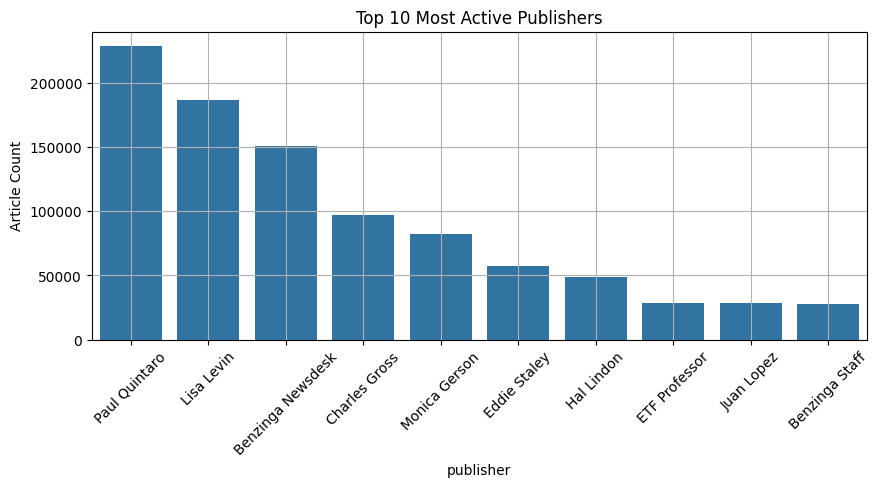

In [14]:
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title("Top 10 Most Active Publishers")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Time-Based EDA — Publication Frequency Over Time
This helps us understand how the volume of news changes across time.

✅  Convert and Normalize Dates
Make sure the date column is in datetime format and normalized to just the date (strip the time):

In [16]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
 # already parsed, but safe
df['publish_day'] = df['date'].dt.date  # get only date part (yyyy-mm-dd)


C:\Users\Cyber Defense\AppData\Local\Temp\ipykernel_13800\443068819.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')


AttributeError: Can only use .dt accessor with datetimelike values